In [53]:
import pandas as pd

In [54]:
data=pd.read_excel("C:/Users/LENOVO/Downloads/Airlines+Data.xlsx")

In [55]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [56]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [57]:
data.shape

(96, 2)

In [58]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [59]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [60]:
data.set_index('Month', inplace= True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

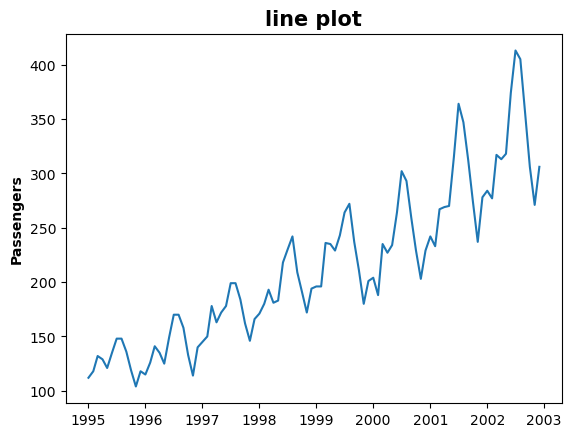

In [62]:
# visualizing the overall data in order to the components present in our data
plt.title("line plot", size = 15, weight = 'bold')
plt.ylabel('Passengers', size = 10, weight = 'bold')
plt.plot(data['Passengers'])

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

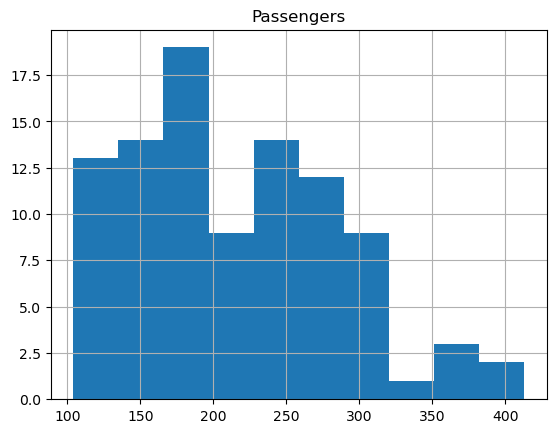

In [63]:
data.hist()

In [64]:
from matplotlib import pyplot
import numpy as np

Text(0.5, 1.0, 'density plot')

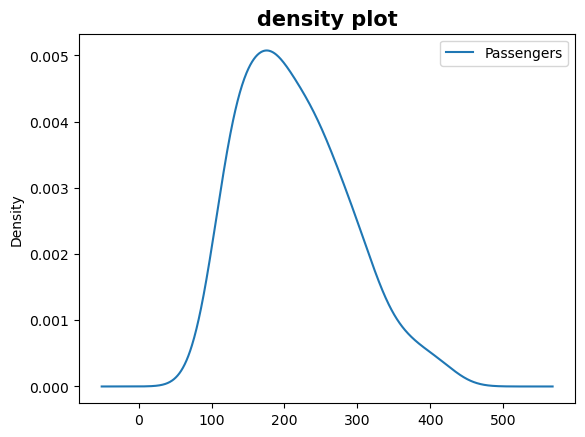

In [65]:
data.plot(kind = 'kde')
plt.title("density plot", size = 15, weight = 'bold')

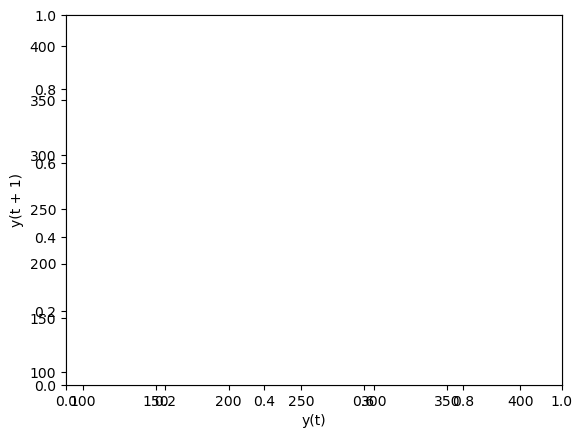

In [66]:
from pandas.plotting import lag_plot
lag_plot(data['Passengers'])
ax = plt.axes()
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


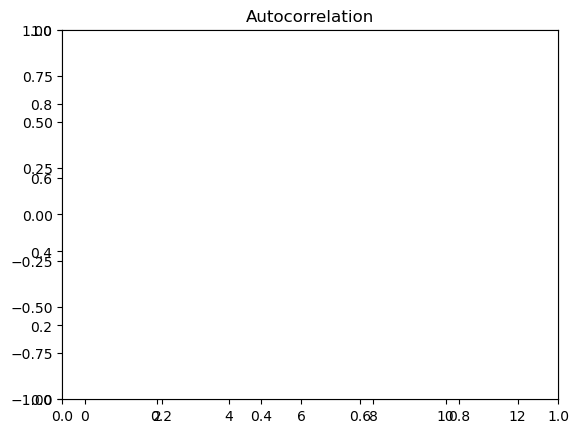

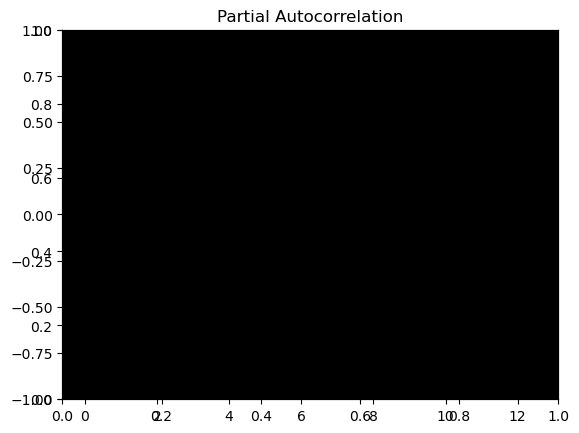

In [67]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
ax = plt.axes()
ax.set_facecolor("white")
tsa_plots.plot_pacf(data.Passengers,lags=12)
ax=plt.axes()
ax.set_facecolor("black")
plt.show()

In [68]:
data["t"] = np.arange(1,97)
data["t_squared"] = data["t"]*data["t"]

data["log_psngr"] = np.log(data["Passengers"])
data.head()

,Passengers,t,t_squared,log_psngr
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [69]:
Train =data.head(84)
Test = data.tail(12)

In [70]:
import statsmodels.formula.api as smf
import numpy as np
# Define the RMSE function
def RMSE(y_true, y_pred):
    return np.sqrt(((y_true-y_pred)**2).mean())

In [71]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
Pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

53.19923653480264

In [73]:
Exp = smf.ols('log_psngr~t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

46.05736110315608

In [74]:
Quad = smf.ols('Passengers~t+t_squared', data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.05188897933152

In [75]:
Quad = smf.ols('Passengers~t+t_squared', data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.05188897933152